In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img_rgb = cv2.imread('/content/drive/MyDrive/CV/sample.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
templ = cv2.resize(cv2.imread('/content/drive/MyDrive/CV/ccs2.png',0),(50,75))
img_rgb_2 = cv2.imread('/content/drive/MyDrive/CV/sample2.jpg')
img_gray_2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

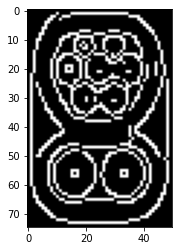

In [ ]:
template = cv2.Canny(templ, 50, 200)
(tH, tW) = template.shape[:2]
plt.imshow(template, cmap='gray')

In [ ]:
h,w = template.shape[::]
print(h,w)

75 50


-1

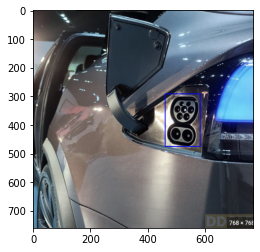

In [ ]:
import imutils


found = None


for scale in np.linspace(0.2, 1.0, 20)[::-1]:


		# resize the image according to the scale, and keep track
		# of the ratio of the resizing
	resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale))
	r = img_gray.shape[1] / float(resized.shape[1])
		# if the resized image is smaller than the template, then break
		# from the loop
	if resized.shape[0] < tH or resized.shape[1] < tW:
		break

    # detect edges in the resized, grayscale image and apply template
		# matching to find the template in the image
	edged = cv2.Canny(resized, 50, 200)
	result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
	(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
		# check to see if the iteration should be visualized
		# if args.get("visualize", False):
		# 	# draw a bounding box around the detected region
		# 	clone = np.dstack([edged, edged, edged])
		# 	cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
		# 		(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
		# 	cv2.imshow("Visualize", clone)
		# 	cv2.waitKey(0)
		# if we have found a new maximum correlation value, then update
		# the bookkeeping variable

	if found is None or maxVal > found[0]:
		found = (maxVal, maxLoc, r)
	# unpack the bookkeeping variable and compute the (x, y) coordinates
	# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
	# draw a bounding box around the detected result and display the image
cv2.rectangle(img_rgb, (startX, startY), (endX, endY), (0, 0, 255), 2)
plt.imshow(img_rgb)
cv2.waitKey(0)

-1

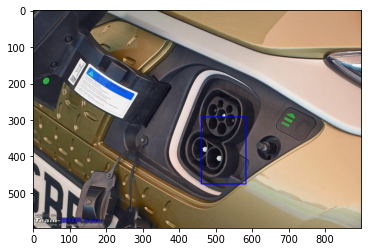

In [ ]:
import imutils


found = None


for scale in np.linspace(0.2, 1.0, 20)[::-1]:
  


		# resize the image according to the scale, and keep track
		# of the ratio of the resizing
	resized = imutils.resize(img_gray_2, width = int(img_gray_2.shape[1] * scale))
	r = img_gray_2.shape[1] / float(resized.shape[1])
		# if the resized image is smaller than the template, then break
		# from the loop
	if resized.shape[0] < tH or resized.shape[1] < tW:
		break

    # detect edges in the resized, grayscale image and apply template
		# matching to find the template in the image
	edged = cv2.Canny(resized, 50, 200)
	result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
	(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
		# check to see if the iteration should be visualized
		# if args.get("visualize", False):
		# 	# draw a bounding box around the detected region
		# 	clone = np.dstack([edged, edged, edged])
		# 	cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
		# 		(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
		# 	cv2.imshow("Visualize", clone)
		# 	cv2.waitKey(0)
		# if we have found a new maximum correlation value, then update
		# the bookkeeping variable

	if found is None or maxVal > found[0]:
		found = (maxVal, maxLoc, r)
	# unpack the bookkeeping variable and compute the (x, y) coordinates
	# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
	# draw a bounding box around the detected result and display the image
cv2.rectangle(img_rgb_2, (startX, startY), (endX, endY), (0, 0, 255), 2)
plt.imshow(img_rgb_2)
cv2.waitKey(0)

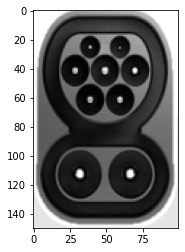

In [ ]:
plt.imshow(template, cmap='gray')

In [ ]:
import datetime

path = '/content/drive/MyDrive/CV/samplevideo.mp4'

cap = cv2.VideoCapture(path)

# counting the number of frames, fps
frames_total = cap.get(cv2.CAP_PROP_FRAME_COUNT)
global fps
fps = cap.get(cv2.CAP_PROP_FPS)
 
# calculate duration of the video
seconds = round(frames_total / fps)
video_time = datetime.timedelta(seconds=seconds)

In [ ]:
video = []

In [ ]:
while True:

  ret, frame = cap.read()

  if frame is None:
    break
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  found = None
  for scale in np.linspace(0.2, 1.0, 20)[::-1]:

    resized = imutils.resize(frame_gray, width=int(frame_gray.shape[1] * scale))
    r = frame_gray.shape[1] / float(resized.shape[1])
    if resized.shape[0] < tH or resized.shape[1] < tW:
      break
    # detect edges in the resized, grayscale image and apply template
		# matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    if found is None or maxVal > found[0]:
      found = (maxVal, maxLoc, r)

	# unpack the bookkeeping variable and compute the (x, y) coordinates
	# of the bounding box based on the resized ratio
  (_, maxLoc, r) = found
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
	# draw a bounding box around the detected result and display the image
  cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
  video.append(frame)
    

        